In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv('datasets/feature_engineered_aqi_data_local.csv')

In [3]:
combined_data.head()

,date,city,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index_clear_sky,uv_index,dust,aerosol_optical_depth,us_aqi,hour_sin,hour_cos,month_sin,month_cos,day_of_week,year
0,2023-06-01 06:00:00+00:00,dhaka,51.3,34.1,369.0,17.9,8.6,44.0,0.15,0.15,1.0,1.17,152.57675,1.000000,6.123234e-17,1.224647e-16,-1.0,3,2023
1,2023-06-01 07:00:00+00:00,dhaka,50.2,32.5,381.0,19.3,10.4,53.0,0.65,0.50,1.0,1.27,151.45615,0.965926,-2.588190e-01,1.224647e-16,-1.0,3,2023
2,2023-06-01 08:00:00+00:00,dhaka,51.3,32.9,397.0,21.1,12.9,67.0,1.75,1.55,1.0,1.26,150.46272,0.866025,-5.000000e-01,1.224647e-16,-1.0,3,2023
3,2023-06-01 09:00:00+00:00,dhaka,58.4,37.8,410.0,21.4,15.5,92.0,3.25,3.20,1.0,1.27,148.54167,0.707107,-7.071068e-01,1.224647e-16,-1.0,3,2023
4,2023-06-01 10:00:00+00:00,dhaka,71.5,46.9,405.0,18.0,16.0,121.0,4.80,4.65,1.0,1.34,146.14584,0.500000,-8.660254e-01,1.224647e-16,-1.0,3,2023


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
combined_data['city_encoded'] = le.fit_transform(combined_data['city'])

In [6]:
X = combined_data[[col for col in combined_data.columns if col not in ["date", "us_aqi", "city"]]]
y = combined_data["us_aqi"]

In [7]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=43)

## KNN REGRESSOR

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
f'Coefficient of determination R^2 on train set {knn.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 1.0'

In [10]:
f'Coefficient of determination R^2 on test set {knn.score(X_val, y_val)}'

'Coefficient of determination R^2 on test set 0.7992275427602683'

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv = 3)

In [13]:
score.mean()

np.float64(0.6876287809848817)

In [14]:
pred = knn.predict(X_test)

C:\Users\stasn\AppData\Local\Temp\ipykernel_27468\2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: xlabel='us_aqi', ylabel='Density'>

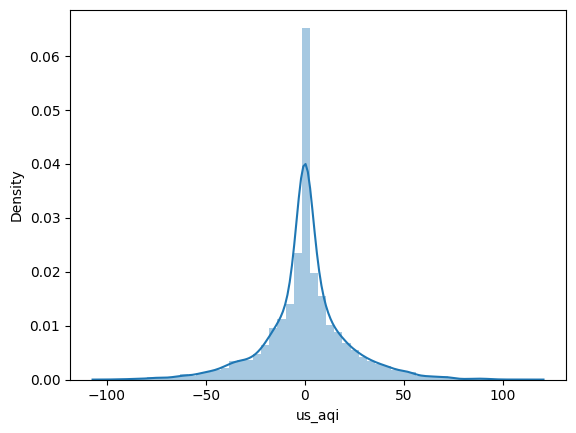

In [15]:
sns.distplot(y_test - pred)

#### HYPERPARAMETER TUNING

In [16]:
scores = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=5, scoring="neg_mean_squared_error")
    scores.append(score.mean())

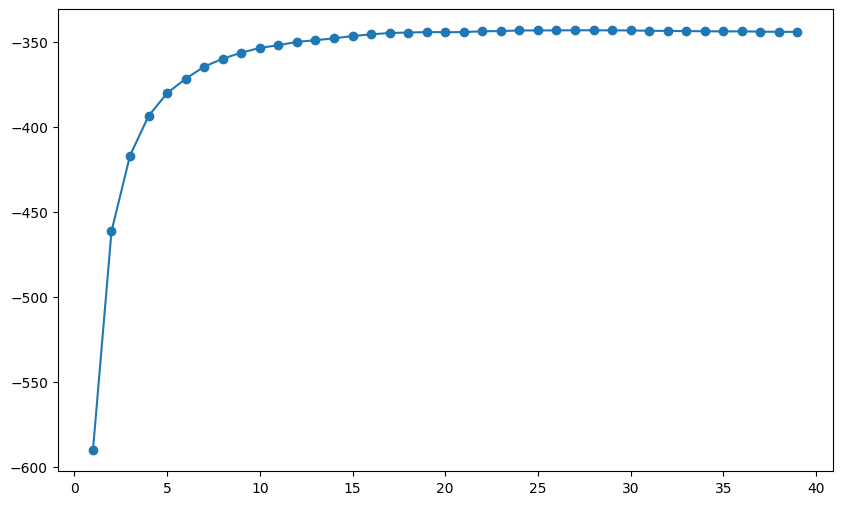

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), scores, marker='o')

In [31]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
cross_val_score(knn, X, y, cv = 5).mean()

np.float64(0.8275769498060328)

C:\Users\stasn\AppData\Local\Temp\ipykernel_27468\2556608887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


<Axes: xlabel='us_aqi', ylabel='Density'>

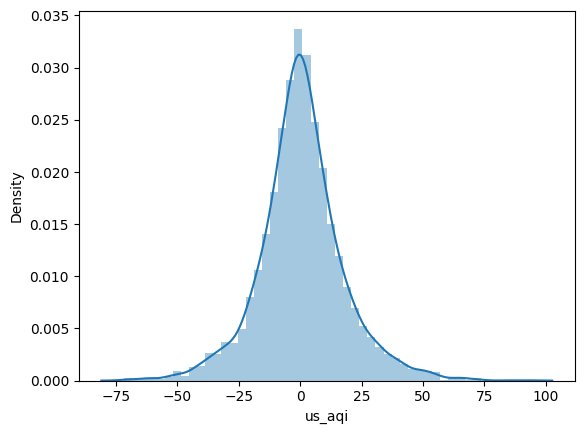

In [33]:
pred = knn.predict(X_test)
sns.distplot(y_test-pred)

In [34]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 12.499982855161628
Mean Sq Error: 297.0875701354602
Root Mean Error: 17.236228419682195


In [35]:
import pickle
pickle.dump(knn, open('models/knn.pkl', 'wb'))